In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

Download yesterday's data for calibrating model coefficients


In [18]:
BTC = yf.download('BTC-USD', start='2023-04-10', end='2023-04-11',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [19]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-10 00:00:00,28336.027344,28336.027344,28336.027344,28336.027344,28336.027344,0
2023-04-10 00:01:00,28336.945312,28336.945312,28336.945312,28336.945312,28336.945312,0
2023-04-10 00:02:00,28315.824219,28315.824219,28315.824219,28315.824219,28315.824219,0
2023-04-10 00:03:00,28315.357422,28315.357422,28315.357422,28315.357422,28315.357422,4345856
2023-04-10 00:04:00,28323.853516,28323.853516,28323.853516,28323.853516,28323.853516,1008640
...,...,...,...,...,...,...
2023-04-10 23:54:00,29635.052734,29635.052734,29635.052734,29635.052734,29635.052734,4474880
2023-04-10 23:55:00,29628.544922,29628.544922,29628.544922,29628.544922,29628.544922,23625728
2023-04-10 23:56:00,29645.187500,29645.187500,29645.187500,29645.187500,29645.187500,7972864


In [20]:
ETH = yf.download('ETH-USD', start='2023-04-10', end='2023-04-11',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [21]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-10 00:00:00,1859.741211,1859.741211,1859.741211,1859.741211,1859.741211,0
2023-04-10 00:01:00,1858.360596,1858.360596,1858.360596,1858.360596,1858.360596,0
2023-04-10 00:02:00,1858.559570,1858.559570,1858.559570,1858.559570,1858.559570,0
2023-04-10 00:03:00,1858.791870,1858.791870,1858.791870,1858.791870,1858.791870,0
2023-04-10 00:04:00,1859.391602,1859.391602,1859.391602,1859.391602,1859.391602,2480640
...,...,...,...,...,...,...
2023-04-10 23:54:00,1908.265137,1908.265137,1908.265137,1908.265137,1908.265137,0
2023-04-10 23:55:00,1908.096069,1908.096069,1908.096069,1908.096069,1908.096069,2169856
2023-04-10 23:56:00,1909.582642,1909.582642,1909.582642,1909.582642,1909.582642,1794560


In [22]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1.309000e+03
mean,28616.464454,28616.464454,28616.464454,28616.464454,28616.464454,7.255832e+06
std,465.038521,465.038521,465.038521,465.038521,465.038521,2.006844e+07
min,28189.271484,28189.271484,28189.271484,28189.271484,28189.271484,0.000000e+00
25%,28301.281250,28301.281250,28301.281250,28301.281250,28301.281250,0.000000e+00
50%,28336.628906,28336.628906,28336.628906,28336.628906,28336.628906,1.049600e+06
75%,29134.808594,29134.808594,29134.808594,29134.808594,29134.808594,6.241280e+06
max,29771.464844,29771.464844,29771.464844,29771.464844,29771.464844,2.528358e+08


In [23]:
ETH.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1.309000e+03
mean,1869.835871,1869.835871,1869.835871,1869.835871,1869.835871,3.268166e+06
std,18.150367,18.150367,18.150367,18.150367,18.150367,1.209003e+07
min,1848.164185,1848.164185,1848.164185,1848.164185,1848.164185,0.000000e+00
25%,1857.851196,1857.851196,1857.851196,1857.851196,1857.851196,0.000000e+00
50%,1860.666504,1860.666504,1860.666504,1860.666504,1860.666504,2.088960e+05
75%,1886.746338,1886.746338,1886.746338,1886.746338,1886.746338,2.423808e+06
max,1917.300171,1917.300171,1917.300171,1917.300171,1917.300171,2.344366e+08


In [25]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1440
mu_2 = lr2.mean() * 1440
sigma_1 = lr1.std() * np.sqrt(1440)
sigma_2 = lr2.std() * np.sqrt(1440)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTC)

In [26]:
mu_1

0.04992923245320796

In [27]:
mu_2

0.02986835684081552

In [28]:
sigma_1

0.025207207007372886

In [29]:
sigma_2

0.02052962422503961

In [30]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [31]:
rho

0.8683316363960628

In [74]:
beta

0.5906403056524736

# Download today's data for feedback control

In [32]:
BTC = yf.download('BTC-USD', start='2023-04-11', end='2023-04-12',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [33]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-11 00:00:00,29653.679688,29653.679688,29653.679688,29653.679688,29653.679688,0
2023-04-11 00:01:00,29672.476562,29672.476562,29672.476562,29672.476562,29672.476562,0
2023-04-11 00:02:00,29663.371094,29663.371094,29663.371094,29663.371094,29663.371094,1028096
2023-04-11 00:03:00,29662.402344,29662.402344,29662.402344,29662.402344,29662.402344,0
2023-04-11 00:04:00,29651.876953,29651.876953,29651.876953,29651.876953,29651.876953,0
...,...,...,...,...,...,...
2023-04-11 23:54:00,30255.207031,30255.207031,30255.207031,30255.207031,30255.207031,0
2023-04-11 23:55:00,30254.021484,30254.021484,30254.021484,30254.021484,30254.021484,0
2023-04-11 23:56:00,30241.605469,30241.605469,30241.605469,30241.605469,30241.605469,0


In [34]:
ETH = yf.download('ETH-USD', start='2023-04-11', end='2023-04-12',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [35]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-11 00:00:00,1911.375854,1911.375854,1911.375854,1911.375854,1911.375854,0
2023-04-11 00:01:00,1910.985107,1910.985107,1910.985107,1910.985107,1910.985107,0
2023-04-11 00:02:00,1910.485107,1910.485107,1910.485107,1910.485107,1910.485107,0
2023-04-11 00:03:00,1910.797852,1910.797852,1910.797852,1910.797852,1910.797852,1628160
2023-04-11 00:04:00,1910.106934,1910.106934,1910.106934,1910.106934,1910.106934,2247680
...,...,...,...,...,...,...
2023-04-11 23:54:00,1892.502075,1892.502075,1892.502075,1892.502075,1892.502075,0
2023-04-11 23:55:00,1892.528687,1892.528687,1892.528687,1892.528687,1892.528687,0
2023-04-11 23:56:00,1891.994141,1891.994141,1891.994141,1891.994141,1891.994141,0


In [36]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [37]:
S1_0

29653.6796875

In [38]:
S2_0

1911.3758544921875

In [39]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

# Simulate co-integrated factor

In [40]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

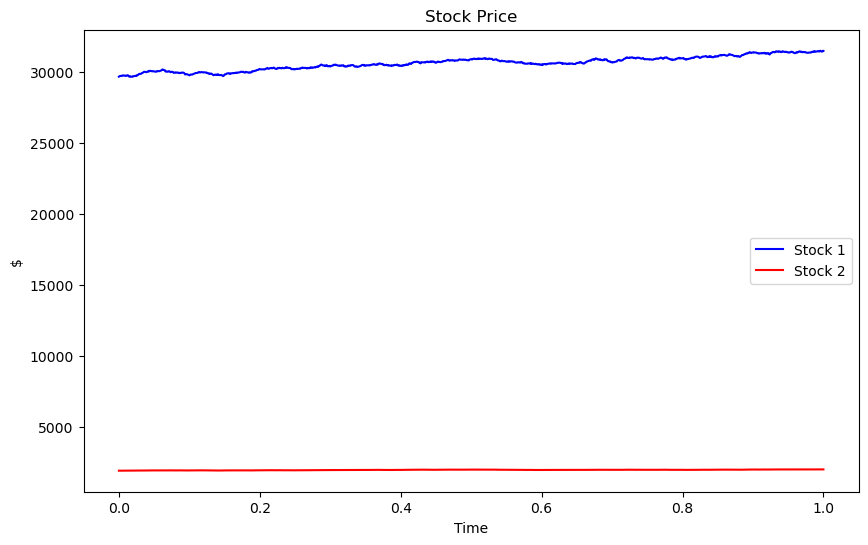

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

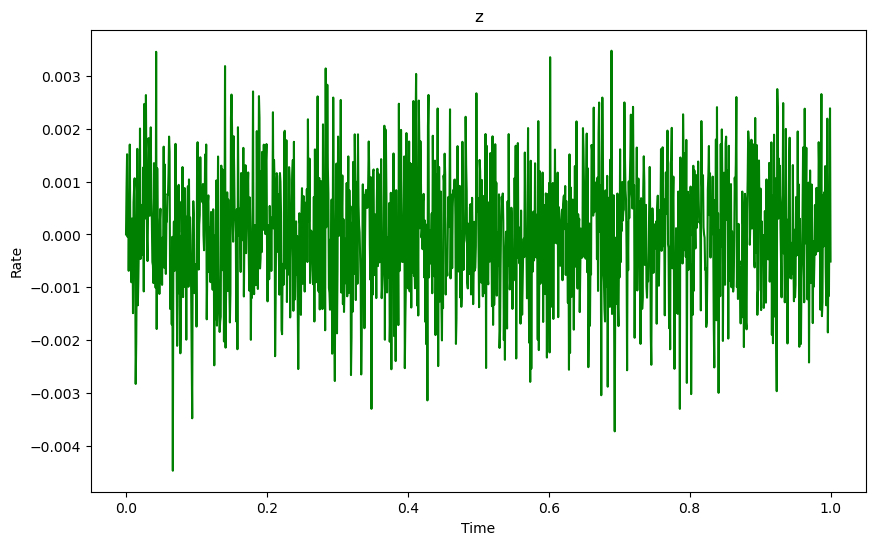

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [43]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho)

Text(0.5, 1.0, 'Weights')

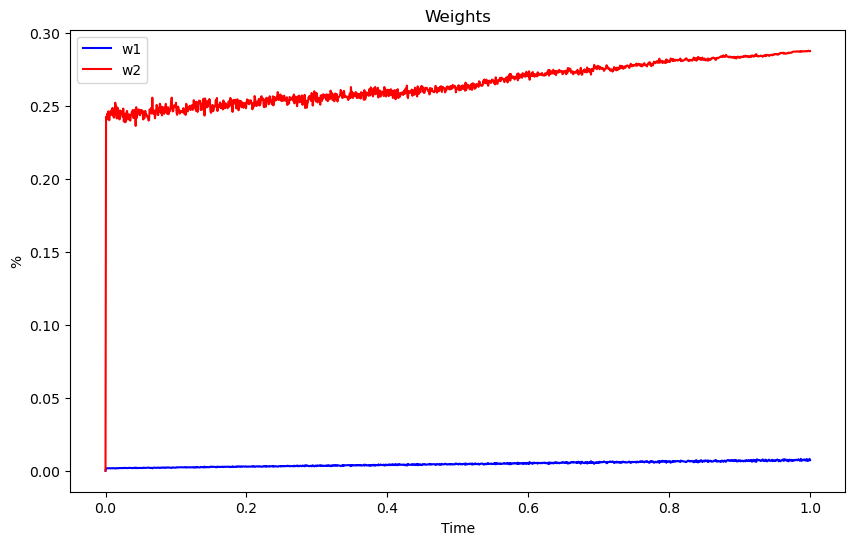

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

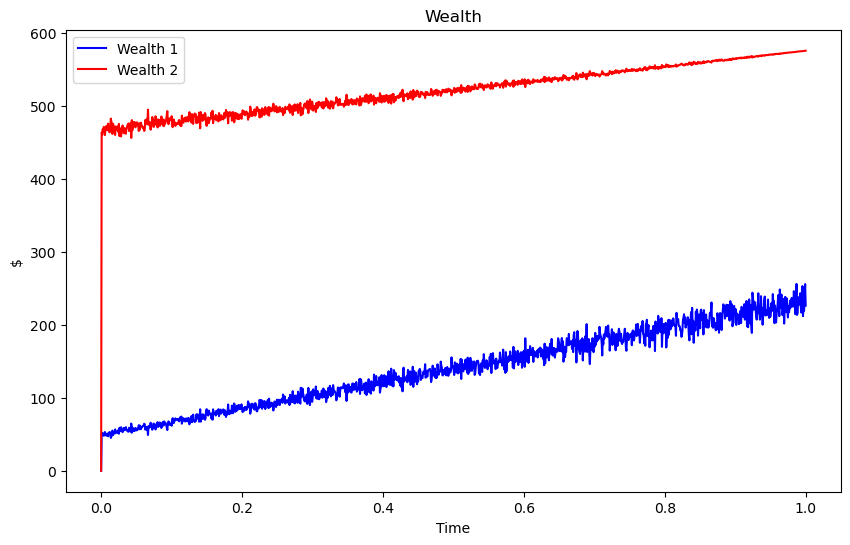

In [45]:

plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [46]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

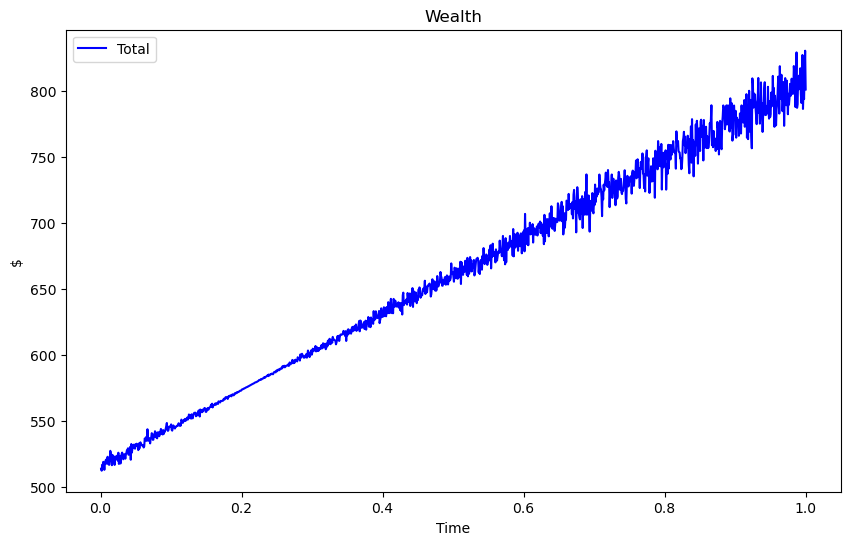

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [48]:
Wealth[1]   # Inital Wealth

array([513.63396268])

In [49]:
Wealth[-1]  # Ending Wealth

array([801.44338691])

In [50]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

0.5603395513799607

In [54]:
rho

0.8683316363960628

In [55]:
beta

0.5906403056524736

In [56]:
Pi_1.mean()

0.00453808529762168

In [57]:
Pi_2.mean()

0.2649364520575259

Text(0.5, 1.0, 'Comparison')

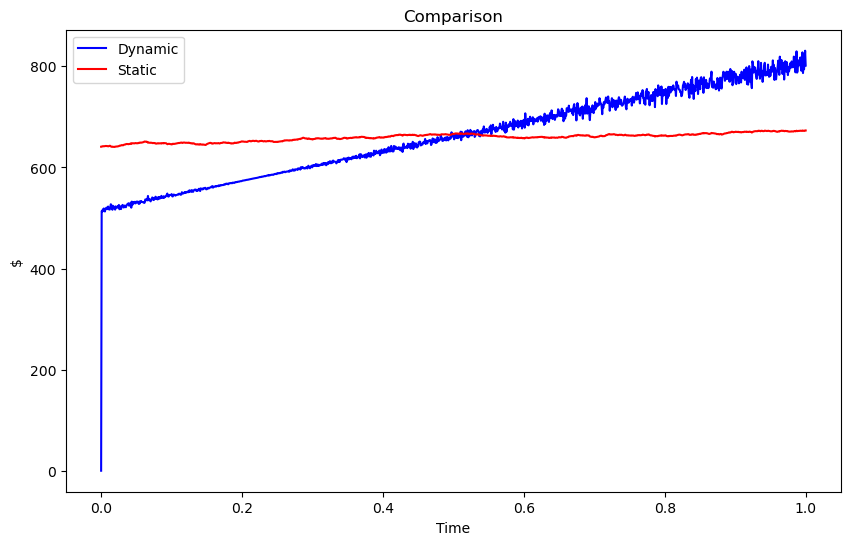

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

## simulation

In [60]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * len(BTC)
mu_2 = lr2.mean() * len(BTC)
sigma_1 = lr1.std() * np.sqrt(len(BTC))
sigma_2 = lr2.std() * np.sqrt(len(ETH))
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.5
delta = 0.8
T = 1
M = len(BTC)

In [61]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [62]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

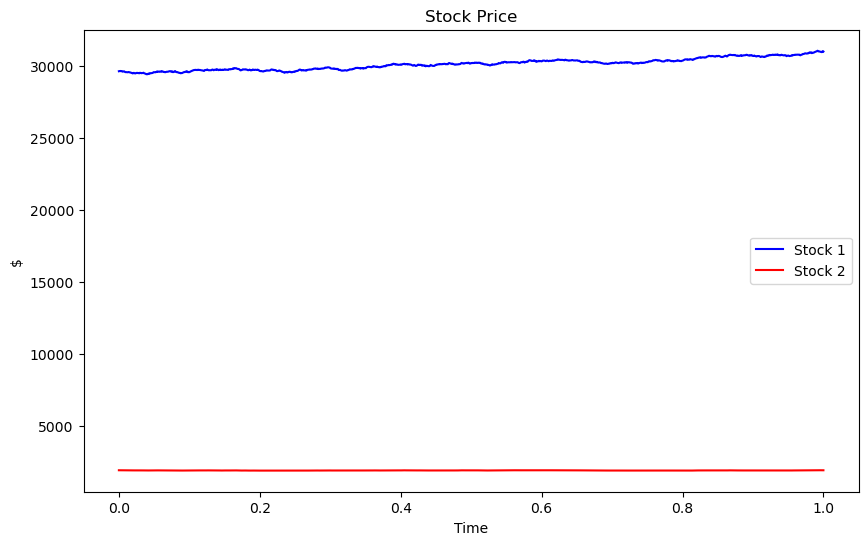

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

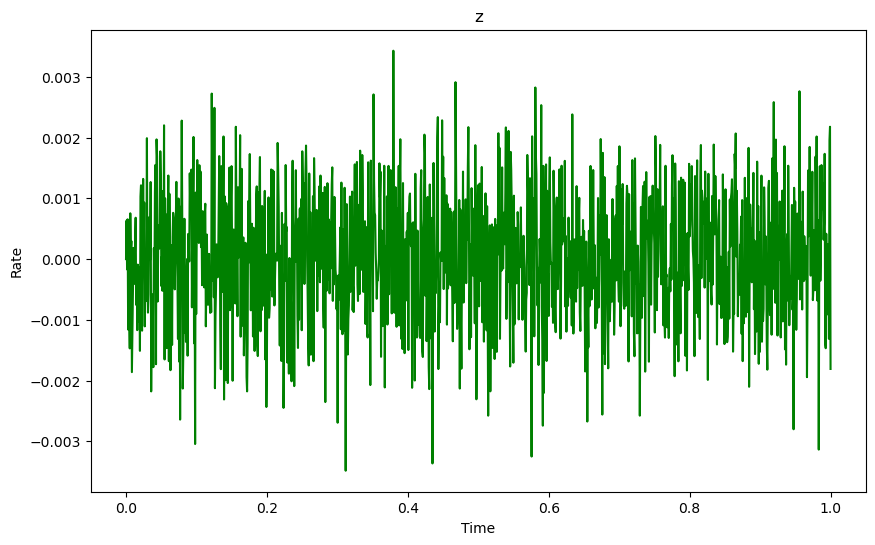

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [65]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho)

Text(0.5, 1.0, 'Weights')

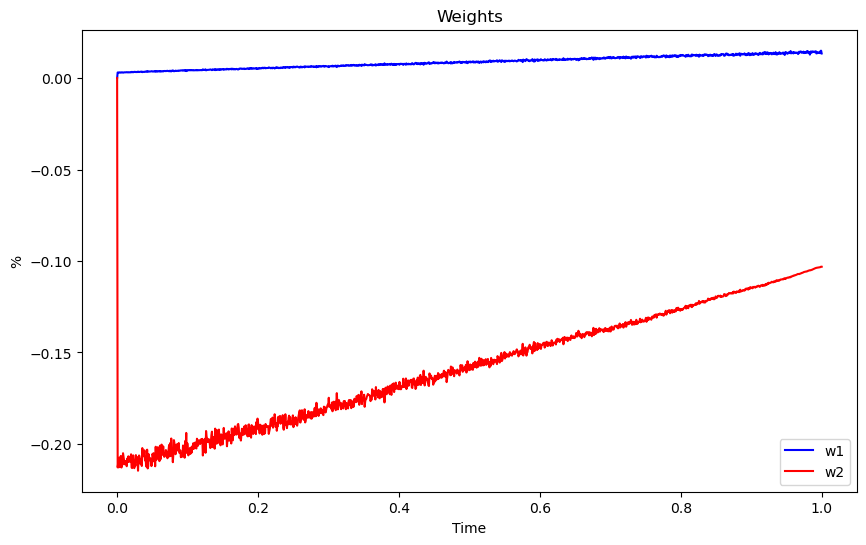

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

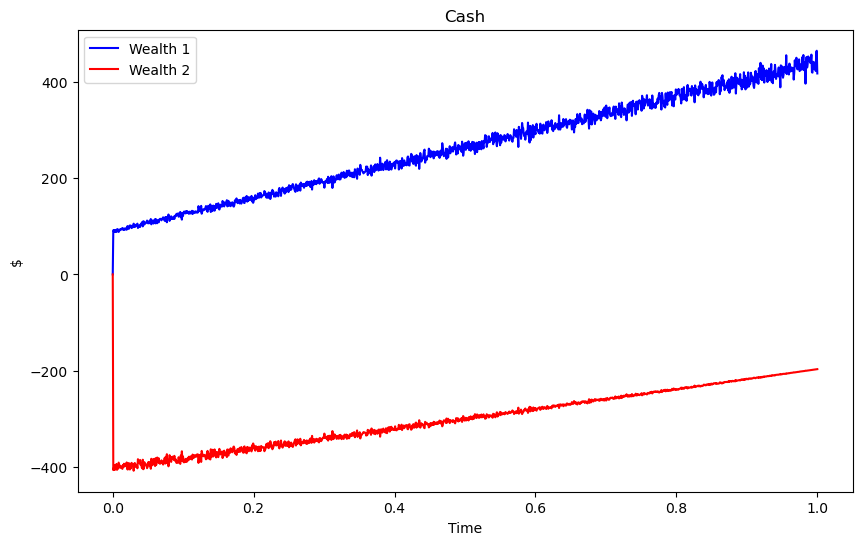

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [68]:
Pi_1.mean()

0.008737809390103695

In [69]:
Pi_2.mean()

-0.1581723368515566

Text(0.5, 1.0, 'Comparison')

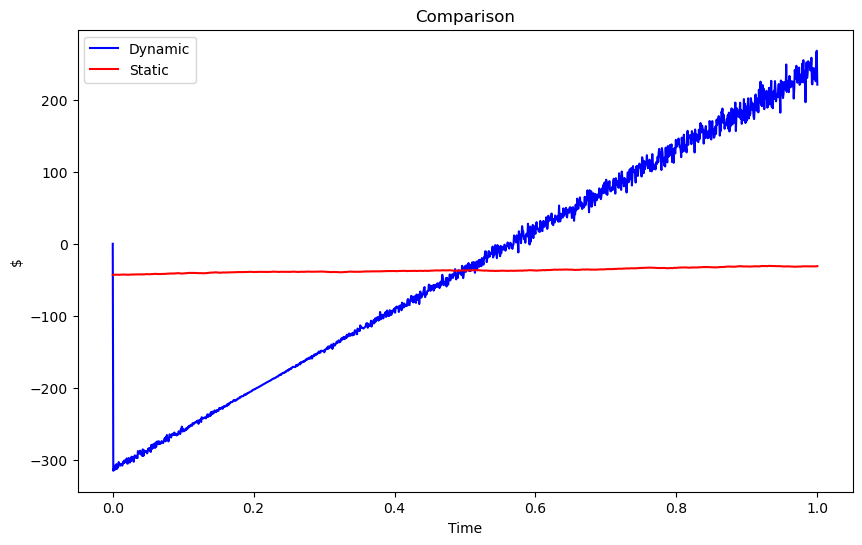

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [71]:
Wealth[1]   # Inital Wealth

array([513.63396268])

In [72]:
Wealth[-1]  # Ending Wealth

array([801.44338691])

In [73]:
Return = (Wealth[-1] - Wealth[1])/Wealth[1]  # Return
Return.item()

0.5603395513799607

In [75]:
rho

0.849924793635197